In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing necessary libraries

In [5]:
books = pd.read_csv('Books.csv')
books.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']
users = pd.read_csv('Users.csv')
users.columns = ['userID','Location','Age']
ratings = pd.read_csv('Ratings.csv')

ratings.columns = ['userID','ISBN','bookRating']
#reading the dataset

/Users/nguyen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
print(books.shape)
print(list(books.columns))
#making sure that our dataset is loaded

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [7]:
books.head()
#checking the first 5 rows of the books dataset

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.dtypes
#checking the data types

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

# Data Preprocessing

In [9]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [10]:
books.loc[books.yearOfPublication == 'DK Publishing Inc', :]
#here we can observe that few years of publication has the publisher details so we are removing it in next steps

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [11]:
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [12]:
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [13]:
books.loc[books.yearOfPublication == 'Gallimard', :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [14]:
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2003
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?ÃÂ©zio"
books.loc[books.ISBN == '078946697X','publisher'] = "Gallimard"
books.loc[books.ISBN == '078946697X','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

In [15]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')

In [16]:
print(sorted(books['yearOfPublication'].unique()))
#sorting the year of publication to see if there are any outliers

[0.0, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2024.0, 2026.0, 2030.0, 2037.0, 2038.0, 2050.0, nan]


In [58]:
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0), 'yearOfPublication'] = np.NAN
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace = True)
#removing the outliers

In [18]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [19]:
books.loc[books.ISBN == '193169656X','publisher'] = "other"
books.loc[books.ISBN == '1931696993','publisher'] = "other"
#changing the Nan values to other in publisher column

Users Data - Pre processing

In [20]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


In [21]:
users.head()
#checking the data in users dataset

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [23]:
print(sorted(users.Age.unique()))
#sorting the age values to check for outliers

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [24]:
users.loc[(users.Age > 90) | (users.Age < 10), 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)
#removing outliers

In [25]:
print(sorted(users.Age.unique()))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


Ratings Data - Pre Processing

In [26]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [27]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Ratings Distribution

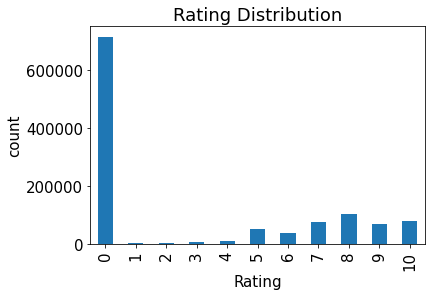

In [28]:
plt.rc("font", size = 15)
ratings.bookRating.value_counts(sort = False).plot(kind = 'bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('count')
plt.plot()
plt.savefig("Rating Distribution.jpg", bbox_inches = "tight", dpi = 100)
#checking the ratings distribution

In [29]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75670906880


In [30]:
new_ratings = ratings[ratings.ISBN.isin(books.ISBN)]
new_ratings = new_ratings[new_ratings.userID.isin(users.userID)]

In [31]:
print(ratings.shape)
print(new_ratings.shape)

(1149780, 3)
(1031136, 3)


In [32]:
new_ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [34]:
combine_book_rating = pd.merge(ratings,books, on = 'ISBN')
columns = ['bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL'] 
#combining ratings and books dataset and dropping unnecessary columns

In [35]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [36]:
combine_book_rating = combine_book_rating.dropna(axis =0,subset =['bookTitle'])

In [37]:
book_ratingcount = (combine_book_rating.
                   groupby(by = ['bookTitle',])['bookRating'].
                   count().
                   reset_index().
                   rename(columns = {'bookRating':'TotalRatingCount'})
                   [['bookTitle','TotalRatingCount']])
#calculating the total book rating count, it is important as popular books are rated by many users

In [38]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [39]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on= 'bookTitle', right_on='bookTitle', how='inner')
#combining the total rating count with our merged datasets

In [40]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [41]:
popularity_threshold=50
rating_popular_book=rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [42]:
print(rating_with_totalratingcount.shape)
rating_with_totalratingcount.head()

(1031136, 5)


,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [43]:
rating_popular_book['ISBN'].nunique()
#observed that there are over 6k popular books with rating count over 50

7085

In [44]:
rating_popular_book = rating_popular_book.drop('ISBN',axis =1)
rating_popular_book.head()

,userID,bookRating,bookTitle,TotalRatingCount
0,276725,0,Flesh Tones: A Novel,60
1,2313,5,Flesh Tones: A Novel,60
2,6543,0,Flesh Tones: A Novel,60
3,8680,5,Flesh Tones: A Novel,60
4,10314,9,Flesh Tones: A Novel,60


In [45]:
if not rating_popular_book[rating_popular_book.duplicated(['userID','bookTitle'])].empty:
    initial_rows=rating_popular_book.shape[0]
    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID','bookTitle'])
    current_rows=rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))
#removing duplicate userId's and BookTitles

Initial dataframe shape (288740, 4)
New dataframe shape (285518, 4)
Removed 3222 rows


In [46]:
rating_popular_book =rating_popular_book[['userID', 'bookRating','TotalRatingCount','bookTitle']]
#interchanging the columns so that our bookTitle is taken as classifier

In [47]:
rating_popular_book

,userID,bookRating,TotalRatingCount,bookTitle
0,276725,0,60,Flesh Tones: A Novel
1,2313,5,60,Flesh Tones: A Novel
2,6543,0,60,Flesh Tones: A Novel
3,8680,5,60,Flesh Tones: A Novel
4,10314,9,60,Flesh Tones: A Novel
...,...,...,...,...
730559,223942,0,68,Love in Another Town
730561,231210,0,68,Love in Another Town
730562,238781,5,68,Love in Another Town
730563,244349,0,68,Love in Another Town


# Implementing KNN

In [48]:
df=rating_popular_book.values.tolist()
#converting our values into list to use in the algorithm

In [49]:
df

[[276725, 0, 60, 'Flesh Tones: A Novel'],
 [2313, 5, 60, 'Flesh Tones: A Novel'],
 [6543, 0, 60, 'Flesh Tones: A Novel'],
 [8680, 5, 60, 'Flesh Tones: A Novel'],
 [10314, 9, 60, 'Flesh Tones: A Novel'],
 [23768, 0, 60, 'Flesh Tones: A Novel'],
 [28266, 0, 60, 'Flesh Tones: A Novel'],
 [28523, 0, 60, 'Flesh Tones: A Novel'],
 [39002, 0, 60, 'Flesh Tones: A Novel'],
 [50403, 9, 60, 'Flesh Tones: A Novel'],
 [56157, 0, 60, 'Flesh Tones: A Novel'],
 [59102, 0, 60, 'Flesh Tones: A Novel'],
 [59287, 0, 60, 'Flesh Tones: A Novel'],
 [63970, 8, 60, 'Flesh Tones: A Novel'],
 [77480, 8, 60, 'Flesh Tones: A Novel'],
 [77940, 0, 60, 'Flesh Tones: A Novel'],
 [81977, 0, 60, 'Flesh Tones: A Novel'],
 [94362, 5, 60, 'Flesh Tones: A Novel'],
 [98391, 9, 60, 'Flesh Tones: A Novel'],
 [112199, 6, 60, 'Flesh Tones: A Novel'],
 [115435, 5, 60, 'Flesh Tones: A Novel'],
 [123981, 0, 60, 'Flesh Tones: A Novel'],
 [128045, 7, 60, 'Flesh Tones: A Novel'],
 [128276, 5, 60, 'Flesh Tones: A Novel'],
 [129311, 7, 

In [50]:
import random
def train_test_split(data, split, train_Set = [], test_Set = []):
    for x in range(len(data)):
        if random.random() < split:
            train_Set.append(data[x])
        else:
            test_Set.append(data[x])
#splitting train and test data

In [51]:
train_Set = []
test_Set = []
split = 0.70
train_test_split(df, split, train_Set, test_Set)
#using 70% as train data and remaining as test data

In [52]:
len(train_Set)

199490

In [53]:
len(test_Set)

86028

In [54]:
import math
def Euclidean(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)
#calculating the euclidean distance

In [55]:
import operator
def KNN(train_Set, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(train_Set)):
        dist = Euclidean(testInstance, train_Set[x], length)
        distances.append((train_Set[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
#KNN algorithm to calculate neighbors based on our Euclidean distance

In [56]:
import operator
def best_book(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0] 
#getting the best recommended book our of all recommendations through class voting

In [57]:
predictions=[]
k = 5
x = np.random.choice(len(test_Set))
neighbors = KNN(train_Set, test_Set[x][:3], k)
most_re = best_book(neighbors)
predictions.append(neighbors)
re_books=[]
for lst in neighbors:
    re_books.append(lst[3])
print('Recommended Books are\n' + repr(re_books) + '\nMost Recommended book among the above is-->'+ repr(most_re) + '\nfor the user who previously liked the book\n' + repr(test_Set[x][-1]))
#taking a random row in test set and recommending books for that user based on the ratings and books recommended by that user previously

Recommended Books are
['Diary of a Mad Bride (Summer Display Opportunity)', 'Fast Food Nation: The Dark Side of the All-American Meal', 'The Red Tent (Bestselling Backlist)', 'The Island of the Day Before', 'Blindness (Harvest Book)']
Most Recommended book among the above is-->'Diary of a Mad Bride (Summer Display Opportunity)'
for the user who previously liked the book
'Loves Music, Loves to Dance'
